
# **Introducción a Pandas**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width=600px>

*La Biblioteca `pandas` proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar. La principal estructura de datos es el `DataFrame`, que puede considerarse como una tabla 2D en memoria (como una hoja de cálculo, con nombres de columnas y etiquetas de filas).*

En primer lugar, vamos a importar `pandas`. por convención se lo importa como `pd`:

In [1]:
import pandas as pd

# **Tipos de datos**

En `pandas` hay dos tipos de datos fundamentales:

- Las [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)
- Los [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

# <mark>Objetos tipo `Series`</mark>
La librería `pandas` contiene las siguientes estructuras de datos útiles:
* Objetos `Series`. Un objeto `Series` es un array 1D, similar a una columna en una hoja de cálculo (con un nombre de columna y etiquetas de fila).
* Objetos `DataFrame`. Es una tabla 2D, similar a una hoja de cálculo (con nombres de columna y etiquetas de fila).


## `Series`
- son parecidas a un vector, con el agregado de un índice
- los datos son homogéneos (del mismo tipo)
- el índice no necesita ser numérico y puede tener identificadores repetidos

Empecemos por crear nuestro primer objeto `Series`.

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar a un `ndarray` 1D
Los objetos `Series` se comportan como `ndarray`s unidimensionales de NumPy, y a menudo se pueden pasar como parámetros a funciones NumPy:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Las operaciones aritméticas sobre `Series` también son posibles, y se aplican *elemento a elemento*, igual que en los `ndarray`s:

In [4]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Si se suma un único número a una `Serie`, ese número se suma a todos los elementos de la `Serie`. Esto también ocurre en los arrays de Numpy

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

Lo mismo ocurre con todas las operaciones binarias como `*` o `/`, e incluso con las operaciones condicionales:

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Cada elemento de un objeto `Series` tiene un identificador único llamado *etiqueta de índice o fila*. Por defecto, es simplemente la posición del elemento en la `Serie` (empezando en `0`) pero también puedes establecer las etiquetas manualmente:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

Puede utilizar las `Series` como si fueran `dict` (diccionarios):

In [8]:
s2["bob"]

83

Puede acceder a los elementos mediante índice, como en un array normal:

In [9]:
s2[1]

83

⚠️ <mark>Para ser más explícito cuándo se accede por etiqueta o por índice, se recomienda utilizar siempre el atributo `loc` cuando se acceda por etiqueta, y el atributo `iloc` cuando se acceda por índice</mark>:

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1]

83

Un slicing sobre una `Series` se aplica sobre las etiquetas de las filas:

In [12]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

Esto puede conducir a resultados inesperados cuando se utilizan las etiquetas numéricas por defecto, ser cuidadoso!!:

In [13]:
sorpresa = pd.Series([1000, 1001, 1002, 1003])
sorpresa

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
slice_sorpresa = sorpresa[2:]
slice_sorpresa

2    1002
3    1003
dtype: int64

¡Ojo! El primer elemento tiene el índice `2`. El elemento con etiqueta de índice `0` fue extraído de esta parte:

In [15]:
try:
    slice_sorpresa[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


✅
Pero recuerda que puedes acceder a los elementos mediante índice utilizando el atributo `iloc`. Esto demuestra otra razón por la que siempre es mejor utilizar `loc` y `iloc` para acceder a los objetos `Series`:

In [16]:
slice_sorpresa.iloc[0]

1002

## <mark>Inicializar una serie desde un `dict`</mark>
Puede crear un objeto `Series` a partir de un `dict`. Las claves se utilizarán como etiquetas de índice:

In [17]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

Se puede controlar qué elementos incluir en la `Serie` y en qué orden especificando explícitamente el `índice` deseado:

In [18]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Alineación automática
Cuando una operación implica varios objetos `Series`, `pandas` alinea automáticamente los elementos haciendo coincidir las etiquetas de índice.

In [19]:
print(s2)
print()
print(s3)
print()
s2 + s3

alice       68
bob         83
charles    112
darwin      68
dtype: int64

alice     68
bob       83
colin     86
darwin    68
dtype: int64



alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

La `Serie` resultante contiene la unión de las etiquetas de índice de `s2` y `s3`. Dado que `"colin"` no aparece en `s2` y `"charles"` en `s3`, estos elementos tienen un valor de resultado `NaN` (Not-a-Number significa *dato faltante*).

La alineación automática es muy útil cuando se trabaja con datos que proceden de diversas fuentes con estructura variable y datos faltantes. Pero si te olvidas de establecer las etiquetas de índice correctas, se puede tener resultados no deseados:

In [20]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

## Inicializar con un escalar
También se puede inicializar una `Series` utilizando un escalar y una lista de etiquetas de índice: todos los elementos tendrán el mismo valor del escalar.

In [21]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## nombre de `Series`

In [22]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Graficar una `Series`
Pandas hace simple graficar `Series` utilizando matplotlib. Sólo tiene que importar matplotlib y llamar al método `plot()`:

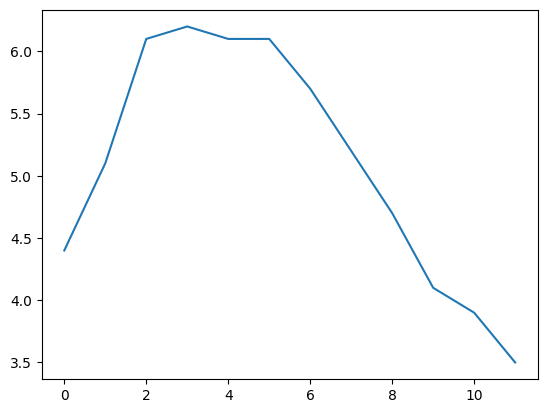

In [23]:
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

Existen *muchas* opciones para representar los datos. Si necesita un tipo particular de gráfico (histogramas, gráficos circulares, etc.), se puede ir a la sección [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) de la documentación de pandas, y ver el código de ejemplo.

# <mark>Objetos `DataFrame`</mark>
- son parecidos a una tabla, con índice (nombre de los renglones) y encabezados (nombres de las columnas)
- cada columna tiene un tipo de dato homogéneo. El `DataFrame` puede ser heterogéneo (por columnas)
- cada columna de un `DataFrame` vendría a ser una `Series`
- tanto el índice como los nombres de las columnas no necesitan ser numéricos

Se pueden definir expresiones para calcular columnas basándose en otras columnas, crear tablas dinámicas, agrupar filas, dibujar gráficos, etc. Se puede pensar un `DataFrame` como un diccionario de `Series`.

## Creación de un `DataFrame`
Se puede crear un DataFrame mediante un diccionario de `Series`:

In [24]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


Algunas cosas a tener en cuenta:
* Las "series" se alinean automáticamente según el índice,
* los valores faltantes se representan como "NaN",
* Los nombres de las series se ignoran (el nombre "year" se eliminó).

Se puede acceder a las columnas usando los nombres de las mismas. Se devuelven como objetos `Series`:

In [25]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

Se pueden acceder varias columnas a la vez:

In [26]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Si se pasa una lista de columnas y/o etiquetas de filas al constructor `DataFrame`, se garantizará que estas columnas y/o filas existirán, en ese orden, y no existirá ninguna otra columna/fila. Por ejemplo:

In [27]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Otra forma de crear un `DataFrame` es pasar todos los valores al constructor como un `ndarray`, o una lista de listas, y especificar los nombres de las columnas y las etiquetas de las filas por separado:

In [28]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


En lugar de un `ndarray`, también se puede pasar un objeto `DataFrame`:

In [29]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0


También es posible crear un `DataFrame` con un diccionario (o lista) de diccionarios (o listas):

In [30]:
people = pd.DataFrame(
    {
        "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
        "hobby": {"alice": "Biking", "bob": "Dancing"},
        "weight": {"alice": 68, "bob": 83, "charles": 112},
        "children": {"bob": 3, "charles": 0}
    }
)
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Multi-indexación
Si todas las columnas son tuplas del mismo tamaño, entonces se consideran como índices múltiples. Lo mismo ocurre con las etiquetas de fila. Por ejemplo:

In [31]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

Ahora se puede obtener un `DataFrame` que contenga todas las columnas `"public"` de forma muy sencilla:

In [32]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [33]:
d5["public", "hobby"]  # d5["public"]["hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

## Eliminar un nivel

In [34]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

Existen dos niveles de columnas y dos niveles de índices. Podemos eliminar un nivel en las columnas llamando a `droplevel()` (lo mismo con los índices):

In [35]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

## <mark>Accediendo a las filas</mark>


In [36]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


El atributo `loc` permite acceder a las filas en lugar de a las columnas. El resultado es un objeto `Series` en el que los nombres de columna del `DataFrame` se asignan como etiquetas de fila:

In [37]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

También puede acceder a las filas mediante índices utilizando el atributo `iloc`:

In [38]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

También se puede hacer un slice de las filas, y esto devuelve un objeto `DataFrame`:

In [39]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


**Usando el segundo eje, accedemos a las columnas**

In [40]:
people.loc["alice":"bob", "birthyear":"weight"]

,birthyear,hobby,weight
alice,1985,Biking,68
bob,1984,Dancing,83


In [41]:
people.iloc[[0,2], [0,3]]

,birthyear,children
alice,1985,NaN
charles,1992,0.0


**más rápido cuando se quiere un único valor**

In [42]:
people.at["bob", "hobby"]

'Dancing'

In [43]:
people.iat[1,1]

'Dancing'

Se puede pasar una matriz booleana para obtener las filas coincidentes:

In [44]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


✅ Esto resulta muy útil cuando se combina con expresiones booleanas:

In [45]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## <mark>Agregar y remover columnas</mark>


In [46]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [47]:
people["age"] = 2018 - people["birthyear"]  # agrega una nueva columna "age"
people["over 30"] = people["age"] > 30      # agrega otra columna "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [48]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

Cuando se añade una nueva columna, ésta debe tener el mismo número de filas. Las filas que faltan se rellenan con NaN y las que sobran se ignoran:

In [49]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})  # alice no está, eugene es ignorado
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


Al añadir una nueva columna, por defecto se añade al final (a la derecha). También se puede insertar una columna en cualquier otro lugar utilizando el método `insert()`:

In [50]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## <mark>Asignando nuevas columnas</mark>
También se pueden crear nuevas columnas usando el método `assign()`. Tenga en cuenta que esto devuelve un nuevo objeto `DataFrame`, el original no se modifica:

In [51]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Tenga en cuenta que no puede acceder a columnas creadas dentro de la misma asignación:

In [52]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


La solución es dividir esta tarea en dos consecutivas:

In [53]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## Asignando valores


In [54]:
nueva_col = pd.Series([True, False, True], index=["alice","bob","charles"]) # Serie para asignar a nueva columna
d6['smoke'] = nueva_col # La etiqueta de la columna se define en la asignación
d6

,hobby,height,weight,age,over 30,pets,body_mass_index,smoke
alice,Biking,172,68,33,True,NaN,22.985398,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [55]:
d6.loc[:, 'jobs'] = np.array([2, 1, 3]) #La columna se asigna a partir de un array de numpy
d6

,hobby,height,weight,age,over 30,pets,body_mass_index,smoke,jobs
alice,Biking,172,68,33,True,NaN,22.985398,True,2
bob,Dancing,181,83,34,True,0.0,25.335002,False,1
charles,NaN,185,112,26,False,5.0,32.724617,True,3


In [56]:
d6.at[ 'alice', "jobs"] = 0 #Asignar un valor usando las etiquetas (.at)
d6

,hobby,height,weight,age,over 30,pets,body_mass_index,smoke,jobs
alice,Biking,172,68,33,True,NaN,22.985398,True,0
bob,Dancing,181,83,34,True,0.0,25.335002,False,1
charles,NaN,185,112,26,False,5.0,32.724617,True,3


In [57]:
d6.iat[0, 8] = 2 #Asignar un valor usando la posición (.iat)
d6

,hobby,height,weight,age,over 30,pets,body_mass_index,smoke,jobs
alice,Biking,172,68,33,True,NaN,22.985398,True,2
bob,Dancing,181,83,34,True,0.0,25.335002,False,1
charles,NaN,185,112,26,False,5.0,32.724617,True,3


## Evaluando expresiones
Una gran característica soportada por pandas es la evaluación de expresiones. Se basa en la biblioteca `numexpr` que debe ser instalada.

In [58]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Las expresiones de asignación también son posibles. Establezcamos `inplace=True` para modificar directamente el `DataFrame` en lugar de obtener una copia modificada:

In [59]:
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


In [60]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


Se puede utilizar una variable local o global en una expresión anteponiéndole `'@'`:

In [61]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Hacer consultas en un`DataFrame`
El método `query()` permite filtrar un `DataFrame` basándose en una expresión de consulta:

In [62]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


## <mark>Ordenar un `DataFrame`</mark>
Se puede ordenar un `DataFrame` llamando a su método `sort_index`. Por defecto, ordena las filas por su etiqueta de índice, en orden ascendente, pero a continuación, vamos a invertir el orden:

In [63]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


Ten en cuenta que `sort_index` devuelve una *copia* ordenada del `DataFrame`. Para modificar `people` directamente, podemos setear el argumento `inplace` a `True`. Además, podemos ordenar las columnas en lugar de las filas estableciendo `axis=1`:

In [64]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


Para ordenar el `DataFrame` por sus valores en lugar de sus etiquetas, podemos utilizar `sort_values` y especificar la columna por la cual ordenar:

In [65]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


## Graficar un `DataFrame`
Al igual que las `Series`, pandas hace que sea fácil crear lindos gráficos basados en un `DataFrame`.

Por ejemplo, es muy simple crear un gráfico de líneas a partir de los datos de un `DataFrame` llamando a su método `plot`:

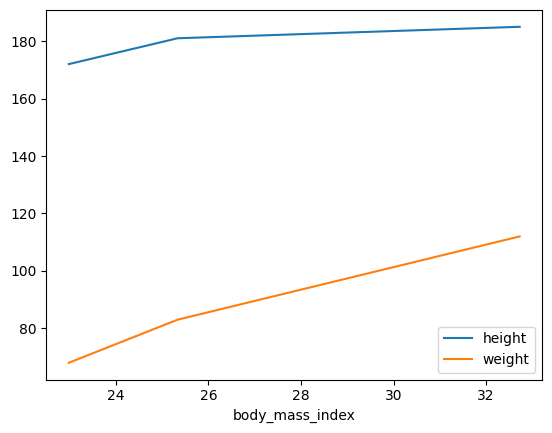

In [66]:
people.sort_values(by="body_mass_index", inplace=True)
people.plot(kind="line", x="body_mass_index", y=["height", "weight"])
plt.show()

De nuevo, hay muchas opciones para graficar, se puede visitar la página  [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) en la documentación de pandas.

## Operaciones con `DataFrame`s


In [67]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


Se pueden aplicar funciones matemáticas NumPy en un `DataFrame`: la función se aplica a todos los valores:

In [68]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Al sumar un único valor a un `DataFrame` se suma ese valor a todos los elementos del `DataFrame`.

In [69]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Por supuesto, lo mismo ocurre con el resto de operaciones binarias, incluidas las operaciones aritméticas (`*`,`/`,`**`...) y condicionales (`>`, `==`...):

In [70]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Las operaciones de agregación como calcular el `máximo`, la `suma` o la `media` de un `DataFrame`, se aplican a cada columna, y se obtiene un objeto `Series`:

In [71]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

El método `all` también es una operación de agregación: comprueba si *todos* los valores son `True` o no. Veamos durante qué meses todos los alumnos obtuvieron una nota superior a `5`:

In [72]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

✅ La mayoría de estas funciones toman un parámetro opcional `axis` que permite especificar a lo largo de qué eje del `DataFrame` desea que se ejecute la operación. El valor por defecto es `axis=0`, lo que significa que la operación se ejecuta en cada columna. Puede establecer `axis=1` para aplicar la operación horizontalmente (en cada fila). Por ejemplo, averigüemos qué alumnos tienen todas las notas superiores a `5`:


In [73]:
(grades > 5).all(axis=1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

El método `any` devuelve `True` si algún valor es True. Veamos quién tiene al menos una nota 10:

In [74]:
(grades == 10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

Si se suma o resta un objeto `Series` a un `DataFrame` (o se aplica cualquier otra operación binaria), pandas intenta aplicar la operación a todas las *filas* del `DataFrame`. Esto sólo funciona si la `Serie` tiene el mismo tamaño que las filas del `DataFrame`. Por ejemplo, vamos a restar la media del `DataFrame` (un objeto `Series`) al `DataFrame`:

In [75]:
grades - grades.mean()  # grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Restamos `7,75` a todas las notas de septiembre, `8,75` a las de octubre y `7,50` a las de noviembre.

Si se quiere restar la media global a cada nota, se tiene la siguiente forma de hacerlo:

In [76]:
grades - grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Alineación automática
De forma similar a las `Series`, cuando se opera sobre múltiples `DataFrame`s, pandas los alinea automáticamente por la etiqueta de fila, pero también por nombres de columna. Vamos a crear un `DataFrame` con puntos extra para cada persona de octubre a diciembre:

In [77]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [78]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


Parece que la suma funcionó en algunos casos, pero muchos elementos están ahora vacíos. Esto se debe a que al alinear los `DataFrame`s, algunas columnas y filas sólo estaban presentes en un dataframe, por lo que se consideró que faltaban en el otro (`NaN`).

## <mark>Manejo de datos faltantes</mark>
Tratar con datos faltantes es una tarea frecuente cuando se trabaja con datos reales. Pandas ofrece algunas herramientas para manejar estos datos.

Intentemos solucionar el problema anterior. Por ejemplo, podemos decidir que los datos que falten den como resultado un cero, en lugar de `NaN`. Podemos sustituir todos los valores `NaN` por cualquier valor utilizando el método `fillna()`:

In [79]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


Sin embargo, es un poco injusto que pongamos las notas a cero en septiembre. Quizá deberíamos decidir que las notas que faltan son notas faltantes, pero los puntos extra que faltan deberían sustituirse por ceros:

In [80]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Eso está mucho mejor: aunque inventamos algunos datos, no fuimos injustos.

Otra forma de manejar los datos que faltan es interpolar. Veamos de nuevo el DataFrame `bonus_points`:

In [81]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Ahora usemos el método `interpolate`. Por defecto, interpola verticalmente (`axis=0`), así que vamos a decirle que interpole horizontalmente (`axis=1`).

In [82]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Bob obtuvo 0 puntos extra en octubre y 2 en diciembre. Cuando interpolamos para obtener un valor en noviembre, obtenemos la media: 1 punto extra.

Colin obtuvo 1 punto de bonificación en noviembre, pero no sabemos cuántos puntos de bonificación tuvo en septiembre, así que no podemos interpolar, por eso sigue faltando un valor en octubre después de la interpolación.

Para solucionarlo, podemos setear los puntos de bonificación de septiembre en 0 antes de la interpolación.


In [83]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [84]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Es algo molesto que la columna de septiembre termine a la derecha. Esto se debe a que los `DataFrame`s que estamos añadiendo no tienen exactamente las mismas columnas (al `DataFrame` de `grades` le falta la columna `"dec"`), así que para hacer las cosas predecibles, pandas ordena las columnas finales alfabéticamente. Para arreglar esto, podemos simplemente añadir la columna que falta antes de sumar:


In [85]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


No hay mucho que podamos hacer con respecto a diciembre y Colin: ya es bastante malo que estemos inventando puntos extra, pero no podemos inventar calificaciones. Vamos a llamar al método `dropna()` para deshacernos de las filas que tienen sólo datos faltantes:

In [86]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


Ahora vamos a eliminar las columnas `NaN`s fijado el argumento `axis` a `1`:

In [87]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Agrupando con `groupby`
Pandas permite agrupar los datos en grupos para realizar cálculos sobre cada grupo.

Primero, vamos a añadir algunos datos extra sobre cada persona para poder agruparlos, tomemos el `DataFrame` de `final_grades` para poder ver cómo se manejan los valores `NaN`:

In [88]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


Ahora vamos a agrupar los datos en este `DataFrame` por hobby:

In [89]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

Ahora podemos calcular la nota media por hobby:

In [90]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


Súper simple!. Notar que los valores `NaN` simplemente se han omitido al calcular las medias.

## Vista general de un Dataframe
Cuando se trabaja con `DataFrames` grandes, es útil obtener una visión rápida de su contenido. Pandas ofrece algunas funciones para ello. En primer lugar, vamos a crear un `DataFrame` grande con una mezcla de valores numéricos, valores faltantes y texto. Observa cómo se muestran sólo los extremos del `DataFrame`:

In [91]:
much_data = np.fromfunction( lambda x,y: (x+y*y)%17*11, (10000, 26) )
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3, "some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


El método `head()` devuelve las 5 primeras filas:

In [92]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Por supuesto, también hay una función `tail()` para ver las 5 filas inferiores o se pueden pasar el número de filas que se quieran visualizar (tambien funciona con `head()`):

In [93]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


El método `info()` muestra un resumen del contenido de cada columna:

In [94]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

Por último, el método `describe()` ofrece una visión general de todos los valores en cada columna:
* `count`: número de valores no nulos (no NaN)
* `mean`: media de valores no nulos
* `std`: [desviación estándar](https://en.wikipedia.org/wiki/Standard_deviation) de valores no nulos
* `min`: mínimo de valores no nulos
* `25%`, `50%`, `75%`: [percentil] 25, 50 y 75 (https://en.wikipedia.org/wiki/Percentile) de valores no nulos
* `max`: máximo de valores no nulos

In [95]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Guardar y cargar dataframes

In [96]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]],
    columns=["hobby", "weight", "birthyear", "children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Guardar
Vamos a guardarlo en CSV, HTML y JSON:


In [97]:
my_df.to_csv("./data/my_df.csv")
my_df.to_html("./data/my_df.html")
my_df.to_json("./data/my_df.json")

Ahora miremos lo que se guardó:

In [98]:
for filename in ("./data/my_df.csv", "./data/my_df.html", "./data/my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# ./data/my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# ./data/my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# ./data/my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Tenga en cuenta que el índice se guarda como la primera columna (sin nombre) en un archivo CSV, como etiquetas `<th>` en HTML y como claves en JSON.



## Cargar un dataframe
Ahora vamos a cargar nuestro archivo CSV de nuevo en un `DataFrame`:

In [99]:
my_df_loaded = pd.read_csv("./data/my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


También existen funciones similares `read_json`, `read_html`.  Podemos leer datos directamente de Internet. Por ejemplo, vamos a cargar las 1.000 principales ciudades de EE.UU. desde GitHub:

In [100]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814


## Concatenación de `DataFrames`

In [101]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [102]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [103]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Observe que esta operación alinea los datos horizontalmente (por columnas) pero no verticalmente (por filas). En este ejemplo, acabamos con varias filas que tienen el mismo índice (por ejemplo, 3).

In [104]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


O podemos decirle a pandas que ignore el índice:

In [105]:
pd.concat([city_loc, city_pop], ignore_index=True)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


Observe que cuando una columna no existe en un `DataFrame`, es como si estuviera lleno de valores `NaN`. Si establecemos `join="inner"`, sólo se devolverán las columnas que existan en ambos `DataFrame`:

In [106]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


Se pueden concatenar `DataFrame`s horizontalmente en lugar de verticalmente estableciendo `axis=1`:

In [107]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


En este caso no tiene mucho sentido porque los índices no se alinean bien (por ejemplo, Cleveland y San Francisco acaban en la misma fila, porque compartían la etiqueta de índice `3`). Así que vamos a reindexar el `DataFrame` por nombre de ciudad antes de concatenar:

In [108]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

,state,lat,lng,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


## Series temporales

Es un tipo de dato auxiliar que permite operar muy fácil con fechas y horas. Al usar las series temporales como índice, hay tareas que se hacen muy simples y eficientemente. Por ejemplo, cambiar la frecuencia de los datos.

Para más detalles ver [Time Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)

In [109]:
import pandas as pd
import numpy as np
rng = pd.date_range('9/1/2019', periods=1000, freq='S')  # 1000 segundos a partir del 01/09/19
rng[-5:]

DatetimeIndex(['2019-09-01 00:16:35', '2019-09-01 00:16:36',
               '2019-09-01 00:16:37', '2019-09-01 00:16:38',
               '2019-09-01 00:16:39'],
              dtype='datetime64[ns]', freq='S')

In [110]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)  # Usa la serie temporal como índice
ts

2019-09-01 00:00:00    262
2019-09-01 00:00:01     29
2019-09-01 00:00:02    447
2019-09-01 00:00:03    209
2019-09-01 00:00:04    445
                      ... 
2019-09-01 00:16:35    254
2019-09-01 00:16:36    426
2019-09-01 00:16:37    476
2019-09-01 00:16:38    405
2019-09-01 00:16:39    178
Freq: S, Length: 1000, dtype: int32

In [111]:
ts.resample('5Min').sum()  # Obtiene una nueva Series, con el periodo indicado

2019-09-01 00:00:00    73128
2019-09-01 00:05:00    76193
2019-09-01 00:10:00    76000
2019-09-01 00:15:00    24709
Freq: 5T, dtype: int32

### Convertir la representación del dato temporal

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [112]:
rng = pd.date_range('2/1/2019', periods=5, freq='MS', inclusive='left')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2019-02-01    0.644122
2019-03-01   -0.327834
2019-04-01   -0.209375
2019-05-01   -0.124545
2019-06-01   -1.078601
Freq: MS, dtype: float64

Convierte el dato de acuerdo al periodo definido originalmente:

In [113]:
ps = ts.to_period()  # Probar cambiar M por S o D al definir el rango de fechas
ps

2019-02    0.644122
2019-03   -0.327834
2019-04   -0.209375
2019-05   -0.124545
2019-06   -1.078601
Freq: M, dtype: float64

Para volver al tipo de dato original:

In [114]:
ps.to_timestamp()

2019-02-01    0.644122
2019-03-01   -0.327834
2019-04-01   -0.209375
2019-05-01   -0.124545
2019-06-01   -1.078601
Freq: MS, dtype: float64